## Observations and Insights 

* Look across all previously generated figures and tables and write at least three observations or inferences that can be made from the data. Include these observations at the top of notebook.

-There are more data points for the Capomulin and Ramicane treatments because fewer of the mice that received these treatments died.

-The tumor sizes for the mice which received Capomulin and Ramicane treatments decreased over time.

-Tumor volume is positively correlated with mouse weight.

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np
from scipy.stats import linregress

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Drop duplicates rows (5 rows were dropped)
clean_results = study_results.groupby(["Mouse ID", "Timepoint"]).mean()
clean_results

# The group function changes the index to both "Mouse ID" and "Timepoint"
# This removes the indexes to create a "flat" index df
flat_index = clean_results.reset_index()

# Combine the data into a single dataset
merge_data = pd.merge(mouse_metadata, flat_index, how="left", on=["Mouse ID"])

# Display the data table for preview
merge_data.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0.0
1,k403,Ramicane,Male,21,16,5,38.825898,0.0
2,k403,Ramicane,Male,21,16,10,35.014271,1.0
3,k403,Ramicane,Male,21,16,15,34.223992,1.0
4,k403,Ramicane,Male,21,16,20,32.997729,1.0


## Summary Statistics

In [2]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for 
# each regimen

# Drop the unnecessary columns
trim_df = merge_data[["Drug Regimen", "Tumor Volume (mm3)"]]

# Adapted from Pandas documentation on the DataFrameGroupBy.agg function
summary_stats = trim_df.groupby("Drug Regimen").agg(['mean', 'median', 'var', 'std', 'sem'])
summary_stats

Tumor Volume (mm3)                                          
                           mean     median        var       std       sem
Drug Regimen                                                             
Capomulin             40.675741  41.557809  24.947764  4.994774  0.329346
Ceftamin              52.591172  51.776157  39.290177  6.268188  0.469821
Infubinol             52.884795  51.820584  43.128684  6.567243  0.492236
Ketapril              55.235638  53.698743  68.553577  8.279709  0.603860
Naftisol              54.331565  52.509285  66.173479  8.134708  0.596466
Placebo               54.033581  52.288934  61.168083  7.821003  0.581331
Propriva              52.388228  50.833737  43.163594  6.569901  0.526013
Ramicane              40.216745  40.673236  23.486704  4.846308  0.320955
Stelasyn              54.233149  52.431737  59.450562  7.710419  0.573111
Zoniferol             53.236507  51.818479  48.533355  6.966589  0.516398

## Bar and Pie Charts

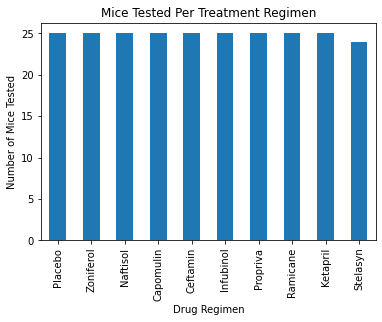

In [3]:
# Generate a bar plot showing the total number of mice for each treatment throughout the course of the study using pandas.

# Get the relevant information
mice_df = merge_data.groupby(["Mouse ID", "Drug Regimen"]).sum().reset_index()

# Chart setup
mice_plot = mice_df["Drug Regimen"].value_counts().plot.bar().set(xlabel="Drug Regimen", 
                ylabel="Number of Mice Tested", title="Mice Tested Per Treatment Regimen")

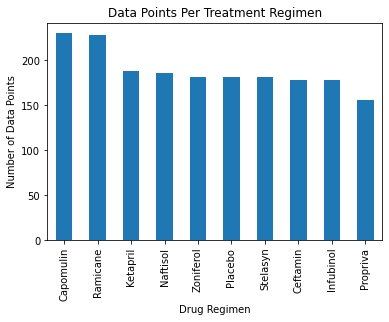

In [4]:
# Generate a bar plot showing the total number of mice for each treatment throughout the course of the study using pandas.

# Chart setup
mice_plot = merge_data["Drug Regimen"].value_counts().plot.bar().set(xlabel="Drug Regimen", 
                ylabel="Number of Data Points", title="Data Points Per Treatment Regimen")

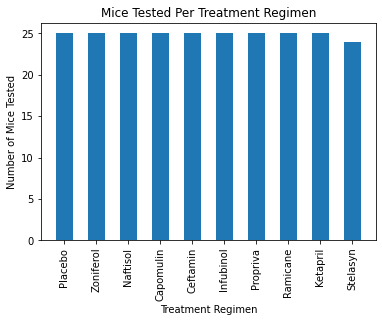

In [5]:
# Generate a bar plot showing the total number of mice for each treatment throughout the course of the study using pyplot.

# Get the relevant information by putting each axis into a list
y_axis = mice_df["Drug Regimen"].value_counts().tolist()
x_axis = mice_df["Drug Regimen"].value_counts().index.tolist()

# Define chart title and axis labels
plt.title("Mice Tested Per Treatment Regimen")
plt.xlabel("Treatment Regimen")
plt.ylabel("Number of Mice Tested")

# Generate the chart and format it
plt.bar(x_axis, y_axis, width=0.52)
plt.xticks(rotation=90)
plt.show()

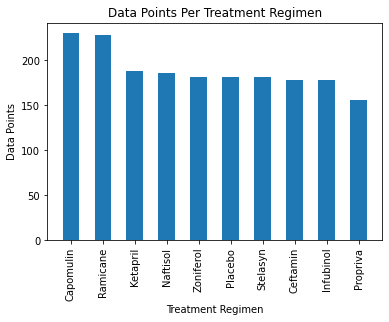

In [6]:
# Generate a bar plot showing the total number of mice for each treatment throughout the course of the study using pyplot.

# Get the relevant information by putting each axis into a list
y_axis = merge_data["Drug Regimen"].value_counts().tolist()
x_axis = merge_data["Drug Regimen"].value_counts().index.tolist()

# Define chart title and axis labels
plt.title("Data Points Per Treatment Regimen")
plt.xlabel("Treatment Regimen")
plt.ylabel("Data Points")

# Generate the chart and format it
plt.bar(x_axis, y_axis, width=0.52)
plt.xticks(rotation=90)
plt.show()

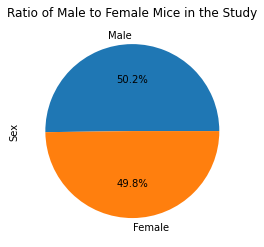

In [7]:
# Generate a pie plot showing the distribution of female versus male mice using pandas
mouse_metadata["Sex"].value_counts().plot.pie(autopct='%1.1f%%',title="Ratio of Male to Female Mice in the Study")

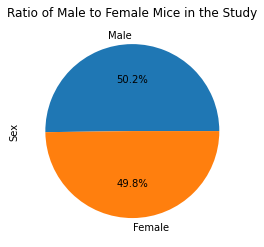

In [8]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot

# Get the relevant information by putting each axis into a list
y_axis = mouse_metadata["Sex"].value_counts().tolist()
x_axis = mouse_metadata["Sex"].value_counts().index.tolist()

# Define chart title and axis labels
plt.title("Ratio of Male to Female Mice in the Study")
plt.ylabel("Sex")

# Generate the chart and format it
plt.pie(y_axis, labels=x_axis, autopct="%1.1f%%")
plt.show()

## Quartiles, Outliers and Boxplots

In [9]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin
treatment_data = merge_data.loc[merge_data["Timepoint"] == 45]
treatment_data = treatment_data.loc[(treatment_data["Drug Regimen"] == "Capomulin") | 
                                   (treatment_data["Drug Regimen"] == "Ramicane") |
                                   (treatment_data["Drug Regimen"] == "Infubinol") |
                                   (treatment_data["Drug Regimen"] == "Ceftamin")
                                   ]

In [10]:
# # Put treatments into a list for for loop (and later for plot labels)
treatment_list = ['Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin']

# # Create empty list to fill with tumor vol data (for plotting)
tumor_list = []
outliers = []

# # Calculate the IQR and quantitatively determine if there are any potential outliers. 
for treatment in treatment_list: 
    
    # Locate the rows which contain mice on each drug and get the tumor volumes
    final_tumor = treatment_data.loc[treatment_data["Drug Regimen"]==treatment,"Tumor Volume (mm3)"]
    
    # add subset 
    tumor_list.append(final_tumor)
    
    # Determine outliers using upper and lower bounds
    quartiles = final_tumor.quantile([0.25,0.5,0.75])
    lower_quartile = quartiles[0.25]
    upper_quartile = quartiles[0.75]
    iqr = upper_quartile - lower_quartile
    lower_bound = lower_quartile - (1.5 * iqr)
    upper_bound = upper_quartile + (1.5 * iqr)
    print(f"Values below {lower_bound} for {treatment} could be outliers.")
    print(f"Values above {upper_bound} for {treatment} could be outliers.")
    outliers = final_tumor.loc[(final_tumor < lower_bound) | (final_tumor > upper_bound)]
    if len(outliers) == 0:
        print(f"{treatment} has no outliers.\n")
    else:
        print(f"Outliers for {treatment} include: {outliers}\n")
    outliers = []

Values below 20.70456164999999 for Capomulin could be outliers.
Values above 51.83201549 for Capomulin could be outliers.
Capomulin has no outliers.

Values below 19.690480101250003 for Ramicane could be outliers.
Values above 49.79900043124999 for Ramicane could be outliers.
Ramicane has no outliers.

Values below 55.35777559500001 for Infubinol could be outliers.
Values above 75.08224443499999 for Infubinol could be outliers.
Infubinol has no outliers.

Values below 52.29350701999999 for Ceftamin could be outliers.
Values above 76.66786758 for Ceftamin could be outliers.
Ceftamin has no outliers.



In [30]:
# Get a list that holds unique treatment names
t_name = treatment_data["Drug Regimen"].unique().tolist()

# Convert the tumor volume series from the DataFrame to a list
tumor_list = treatment_data["Tumor Volume (mm3)"].tolist()

# Create empty list for each treatment to hold with tumor vol data (for plotting)
Ramicane = []
Capomulin = []
Infubinol = []
Ceftamin = []

# Create for loop iterator
i = 0

# Loop through the treatment list and assign the tumor data to the respective treatment lists
for x in treatment_list:
    if t_name[0] == treatment_list[i]:
        Ramicane.append(tumor_list[i])
        i = i + 1
    elif t_name[1] == treatment_list[i]:
        Capomulin.append(tumor_list[i])
        i = i + 1
    elif t_name[2] == treatment_list[i]:
        Infubinol.append(tumor_list[i])
        i = i + 1
    elif t_name[3] == treatment_list[i]:
        Ceftamin.append(tumor_list[i])
        i = i + 1

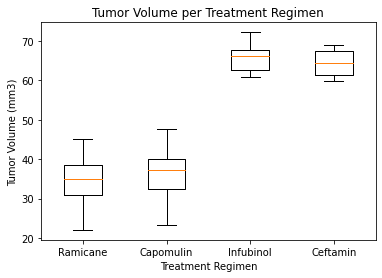

In [33]:
# Boxplots
fig1, tumor_plt = plt.subplots()
tumor_plt.set_xlabel("Treatment Regimen")
tumor_plt.set_ylabel("Tumor Volume (mm3)")
tumor_plt.set_title("Tumor Volume per Treatment Regimen")
tumor_plt.boxplot([Ramicane, Capomulin, Infubinol, Ceftamin], labels=t_name)
plt.show()

## Line and Scatter Plots

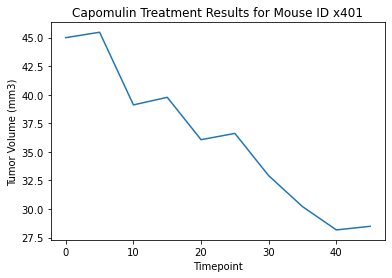

In [12]:
# Generate a line plot of time point versus tumor volume for a mouse treated with Capomulin

# Filter the data
x401 = merge_data[["Drug Regimen", "Mouse ID", "Timepoint", "Tumor Volume (mm3)"]]
x401 = x401.loc[(x401["Mouse ID"] == "x401")]

# Convert the dataframe series data to lists
x401_xaxis = x401["Timepoint"].tolist()
x401_yaxis = x401["Tumor Volume (mm3)"].tolist()

# Create, set labels, and show the plot
x401_plot = plt.plot(x401_xaxis, x401_yaxis)
plt.xlabel("Timepoint")
plt.ylabel("Tumor Volume (mm3)")
plt.title("Capomulin Treatment Results for Mouse ID x401")
plt.show()

## Correlation and Regression

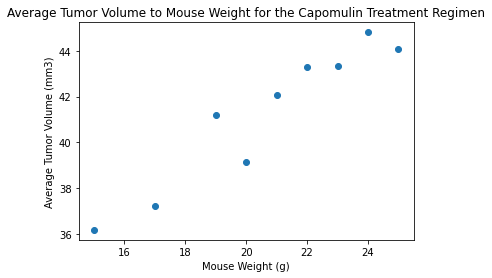

In [13]:
# Generate a scatter plot of mouse weight versus average tumor volume for the Capomulin regimen

# Get the requisite data, filter it, and group by weight to get average tumor volume
capomulin_data = merge_data.loc[merge_data["Drug Regimen"] == "Capomulin"]
capomulin_data = capomulin_data[["Weight (g)", "Tumor Volume (mm3)"]]
capomulin_data = capomulin_data.groupby(["Weight (g)"]).mean().reset_index()

# Define the plot axes
capo_xaxis = capomulin_data["Weight (g)"]
capo_yaxis = capomulin_data["Tumor Volume (mm3)"]

# Create, set labels, and show the plot
capo_plot = plt.scatter(capo_xaxis, capo_yaxis)
plt.xlabel("Mouse Weight (g)")
plt.ylabel("Average Tumor Volume (mm3)")
plt.title("Average Tumor Volume to Mouse Weight for the Capomulin Treatment Regimen")
plt.show()

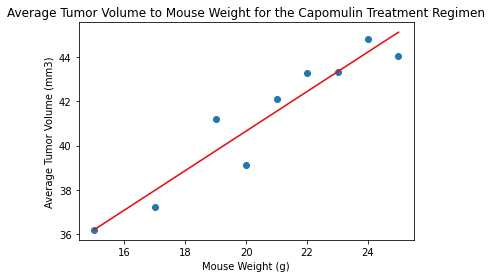

In [14]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen
plt.scatter(capo_xaxis, capo_yaxis)
plt.xlabel("Mouse Weight (g)")
plt.ylabel("Average Tumor Volume (mm3)")
plt.title("Average Tumor Volume to Mouse Weight for the Capomulin Treatment Regimen")
(slope, intercept, rvalue, pvalue, stderr) = linregress(capo_xaxis, capo_yaxis)
regress_values = capo_xaxis * slope + intercept
plt.plot(capo_xaxis, regress_values, "r-")
plt.show()
# line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

In [15]:
print(f"The correlation coefficient for the plot is: {capo_xaxis.corr(capo_yaxis)}")

The correlation coefficient for the plot is: 0.9505243961855271
